<a href="https://colab.research.google.com/github/sialdyy/Ngoreng/blob/main/UndergraduateThesisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPROCESSING DATA

## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
movies = pd.read_csv('/content/drive/MyDrive/Data/movies.csv')

In [ ]:
print('Information of Dataset Movies')
print('_____________________________')
print(' ')

print('   Number of data:   ', movies.shape[0])
print('   Number of columns:', movies.shape[1])

print('____________________________')
print(movies.dtypes)

movies.head(5)

Information of Dataset Movies
_____________________________
 
   Number of data:    2000
   Number of columns: 13
____________________________
Title                 object
Rating               float64
Year                   int64
Month                 object
Certificate           object
Runtime               object
Directors             object
Stars                 object
Genre                 object
Filming_location      object
Budget                object
Income                object
Country_of_origin     object
dtype: object


,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


## Data Cleaning

In [ ]:
# Menghapus variabel yang tidak digunakan
movies = movies.drop(['Title', 'Directors', 'Stars', 'Filming_location', 'Country_of_origin'], axis=1)

In [ ]:
# Memisahkan kategori di dalam kolom 'Genre' dan membuat kolom baru
movies[['Genre_Utama', 'Genre2', 'Genre3']] = movies['Genre'].str.split(',', expand=True)

# Menghapus kolom 'Genre' asli
movies = movies.drop(['Genre', 'Genre2', 'Genre3'], axis=1)

In [ ]:
# Menghapus baris data yang terdapat kesalahan penulisan
movies = movies.drop(movies[movies['Month'] == '2014'].index)
movies = movies.drop(movies[movies['Month'] == '2008'].index)

In [ ]:
# Pengecekkan kategori pada variabel 'Certificate'
unique_categories = movies['Certificate'].unique()
print("Data Kategori Unik:", unique_categories)

Data Kategori Unik: ['PG-13' 'PG' 'R' 'TV-14' 'TV-MA' 'TV-PG' 'TV-Y7' 'Not Rated' nan 'NC-17'
 'TV-G' 'Unrated' 'G']


In [ ]:
# Jumlah masing-masing kategori pada variabel 'Certificate'
category_counts = movies['Certificate'].value_counts()
print("Frekuensi Kategori:")
print(category_counts)

Frekuensi Kategori:
R            867
PG-13        713
PG           225
Not Rated     61
TV-MA         40
G             22
TV-14         12
TV-PG          9
NC-17          6
Unrated        6
TV-G           3
TV-Y7          1
Name: Certificate, dtype: int64


In [ ]:
# Penghapusan kategori pada variabel 'Certificate' yang tidak sesuai
categories_to_remove = ['Not Rated', 'TV-MA', 'TV-14', 'TV-PG', 'Unrated', 'TV-G', 'TV-Y7']

# Menggunakan boolean indexing untuk menghapus data kategori tertentu
movies = movies[~movies['Certificate'].isin(categories_to_remove)]

In [ ]:
# Pengecekkan nilai 'NaN' atau nilai yang kosong
movies.isna().sum()

Rating          1
Year            0
Month           0
Certificate    33
Runtime         0
Budget          0
Income          0
Genre_Utama     0
dtype: int64

In [ ]:
# Persentase nilai 'NaN' atau nilai yang kosong
def null_ratio(movies, limit=-1):
  percent_missing = movies.isnull().sum() * 100 / len(movies)
  movies_result = pd.DataFrame({
                  "filled":movies.notnull().sum(),
                  "N null":movies.isna().sum(),
                  "null_ratio(%)": percent_missing,
                  }
  )
  nr =  movies_result.sort_values("null_ratio(%)",ascending=False)
  return nr[nr["null_ratio(%)"] > limit]

null_ratio(movies,0)

,filled,N null,null_ratio(%)
Certificate,1833,33,1.768489
Rating,1865,1,0.053591


In [ ]:
# Pengecekkan penulisan 'Unknown' pada variabel data
def check_unknowns():
    for col in movies.columns:
        unknown_percent = (movies[col] == 'Unknown').sum() / len(movies) * 100
        print(f'{col}: {unknown_percent:.2f}%')
check_unknowns()

Rating: 0.00%
Year: 0.00%
Month: 0.00%
Certificate: 0.00%
Runtime: 0.05%
Budget: 11.95%
Income: 4.93%
Genre_Utama: 0.00%


In [ ]:
# Mengubah tulisan 'Unknown' menjadi angka '0'
for col in ['Budget', 'Income', 'Runtime']:
    movies[col].replace('Unknown', '0', inplace=True)

<ipython-input-13-ad550d02b94e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[col].replace('Unknown', '0', inplace=True)


In [ ]:
# Konversi nilai mata uang menjadi mata uang '$'
conversion_dict = {
    '$': 1.0,
    '€': 1.07,
    '£': 1.21,
    '₩': 0.00078,
    'C': 0.73,
    '₹': 0.012,
    '¥': 0.0075,
    'A': 0.68,
    'S': 0.095,
    'D': 0.14,
    'N': 0.10
}

In [ ]:
# Konversi nilai pada variabel 'Budget' dan 'Income'
import re
for col in ['Budget', 'Income']:
  movies[col] = movies[col].apply(lambda x:
                                  int(re.sub('[^0-9]', '', x))*conversion_dict.get(x[0], 1))

<ipython-input-15-64c22bd12608>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[col] = movies[col].apply(lambda x:


In [ ]:
# Pengubahan tipe data
import numpy as np
movies['Year']    = movies['Year'].astype(int)
movies['Runtime'] = movies['Runtime'].astype(int)
movies.loc[:, ['Budget',
               'Income',
               'Runtime',]] = movies.loc[:, ['Budget',
                                             'Income',
                                             'Runtime',]].replace(0, np.nan)

<ipython-input-16-36aea3b39304>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Year']    = movies['Year'].astype(int)
<ipython-input-16-36aea3b39304>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Runtime'] = movies['Runtime'].astype(int)
<ipython-input-16-36aea3b39304>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
# Menghapus baris yang terdapat 'NaN'
df = movies.dropna()

In [ ]:
# Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       1605 non-null   float64
 1   Year         1605 non-null   int64  
 2   Month        1605 non-null   object 
 3   Certificate  1605 non-null   object 
 4   Runtime      1605 non-null   float64
 5   Budget       1605 non-null   float64
 6   Income       1605 non-null   float64
 7   Genre_Utama  1605 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 112.9+ KB


## Pelabelan Data

In [ ]:
# Pembuatan variabel 'Total_Profit' untuk penentuan label kategori untung atau rugi
df["Total_Profit"] = df["Income"] - df["Budget"]

<ipython-input-19-30fc20339dc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total_Profit"] = df["Income"] - df["Budget"]


In [ ]:
# Pengecekkan pada variabel 'Total_Profit' yang bernilai 0
df[df['Total_Profit']=='0']

,Rating,Year,Month,Certificate,Runtime,Budget,Income,Genre_Utama,Total_Profit


In [ ]:
# Pembuatan kategori pada variabel 'Profit' berdasarkan hasil 'Total_Profit'
df['Profit'] = np.where(df['Total_Profit']> 0, 'Untung', 'Rugi')

# Menghapus kolom 'Total_Profit', 'Budget', dan 'Income' untuk menghindari bias
df = df.drop(['Total_Profit', 'Budget', 'Income'], axis=1)

df.head(2000)

<ipython-input-21-f12f4b48de93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = np.where(df['Total_Profit']> 0, 'Untung', 'Rugi')


,Rating,Year,Month,Certificate,Runtime,Genre_Utama,Profit
0,7.8,2022,December,PG-13,192.0,Action,Untung
1,7.6,2022,December,PG,117.0,Animation,Rugi
2,7.3,2022,August,R,127.0,Action,Untung
4,6.4,2022,December,PG-13,102.0,Horror,Untung
6,6.1,2022,October,R,134.0,Comedy,Rugi
...,...,...,...,...,...,...,...
1993,7.5,2003,January,R,126.0,Crime,Untung
1994,5.4,2003,October,R,119.0,Mystery,Untung
1996,5.5,2003,July,PG-13,117.0,Action,Untung
1997,5.8,2003,November,R,98.0,Horror,Untung


In [ ]:
# Import data untuk proses Decision Tree dan Cost Sensitive Decision Tree menggunakan RapidMiner
import csv
df.to_csv('Data TA.csv', index=False)

## Pengecekkan Ketidakseimbangan Data

In [ ]:
# Pengecekkan jumlah pada masing-masing kategori variabel 'Profit'
df['Profit'].value_counts()

Untung    1372
Rugi       233
Name: Profit, dtype: int64

In [ ]:
# Persentase masing-masing kategori variabel 'Profit'
df['Profit'].value_counts(normalize = True)

Untung    0.854829
Rugi      0.145171
Name: Profit, dtype: float64

# ANALISIS DESKRIPTIF

## Genre Film

In [ ]:
# Membuat tabulasi silang antar variabel 'Profit' dan 'Genre'
tabulasi = pd.crosstab(df['Profit'], df['Genre_Utama'], margins= True)
tabulasi

Genre_Utama,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller,All
Profit,,,,,,,,,,,,,,
Rugi,70,13,5,12,51,21,49,1,9,0,0,0,2,233
Untung,500,92,96,82,265,69,189,3,66,4,1,2,3,1372
All,570,105,101,94,316,90,238,4,75,4,1,2,5,1605


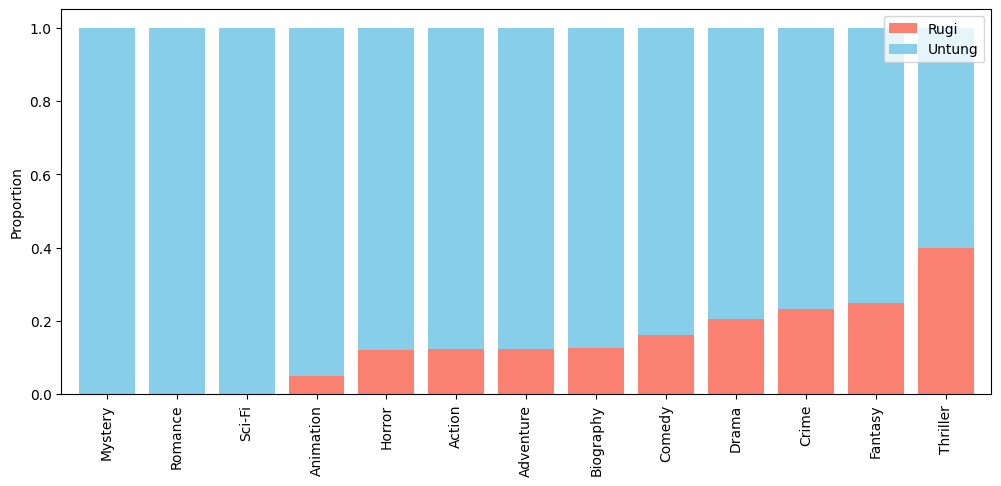

In [ ]:
# Menampilkan plot antar variabel 'Profit' dan 'Genre'
import matplotlib.pyplot as plt

genre_order = ['Mystery', 'Romance', 'Sci-Fi', 'Animation', 'Horror', 'Action', 'Adventure', 'Biography', 'Comedy', 'Drama', 'Crime', 'Fantasy', 'Thriller']
df['Genre_Utama'] = pd.Categorical(df['Genre_Utama'], categories=genre_order, ordered=True)

# Membuat tabulasi silang antar variabel untuk pembuatan plot
pd.crosstab(df['Genre_Utama'], df['Profit'], normalize='index').plot.bar(rot=0,stacked=True, color=['salmon', 'skyblue'], width=0.8, figsize=(12, 5))

# Menambahkan label dan judul
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.xlabel('')
plt.xticks(rotation=90, ha='center')

# Menampilkan subplot
plt.show()

## Runtime Film

In [ ]:
# Membuat tabulasi silang antar variabel 'Profit' dan 'Runtime'
tabulasi = pd.crosstab(df['Runtime'], df['Profit'], margins= True)
tabulasi

Profit,Rugi,Untung
Runtime,,
75.0,0,1
77.0,0,2
78.0,0,1
79.0,0,2
80.0,0,3
...,...,...
188.0,1,0
191.0,1,0
192.0,0,1


Text(0.5, 0, '')

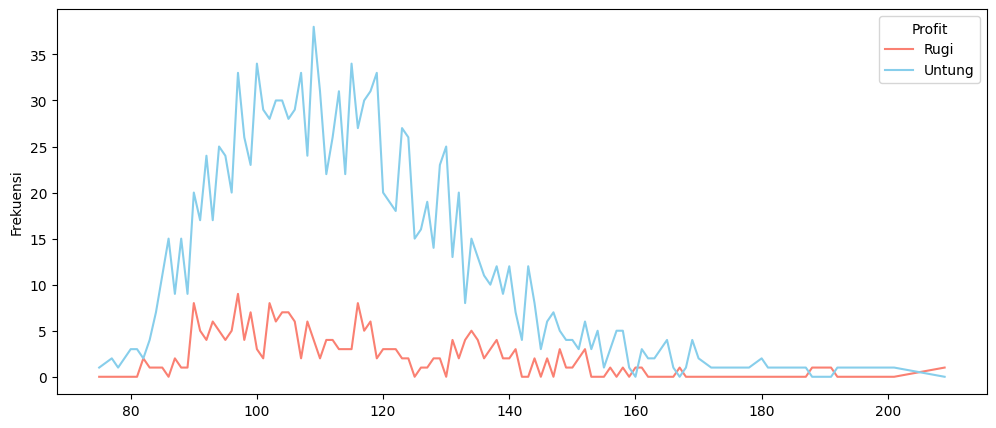

In [ ]:
# Menampilkan plot antar variabel 'Profit' dan 'Runtime'
pd.crosstab(df['Runtime'], df['Profit']).plot.line(rot=0, color=['salmon', 'skyblue'], figsize=(12, 5))
plt.ylabel('Frekuensi')
plt.xlabel('')

## Certificate Film

In [ ]:
# Membuat tabulasi silang antar variabel 'Profit' dan 'Certificate'
tabulasi = pd.crosstab(df['Profit'], df['Certificate'], margins= True)
tabulasi

Certificate,G,NC-17,PG,PG-13,R,All
Profit,,,,,,
Rugi,0,0,17,64,152,233
Untung,21,4,178,593,576,1372
All,21,4,195,657,728,1605


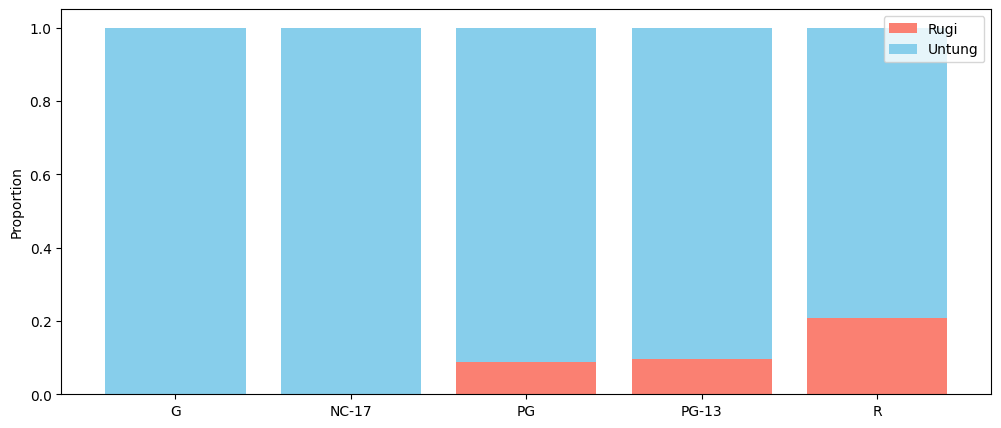

In [ ]:
# Menampilkan plot antar variabel 'Profit' dan 'Certificate'
import matplotlib.pyplot as plt

# Membuat tabulasi silang antar variabel untuk pembuatan plot
pd.crosstab(df['Certificate'], df['Profit'], normalize='index').plot.bar(rot=0,stacked=True, color=['salmon', 'skyblue'], width=0.8, figsize=(12, 5))

# Menambahkan label dan judul
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.xlabel('')

# Menampilkan subplot
plt.show()

## Month

In [ ]:
# Membuat tabulasi silang antar variabel 'Profit' dan 'Month'
tabulasi = pd.crosstab(df['Profit'], df['Month'], margins= True)
tabulasi

Month,April,August,December,February,January,July,June,March,May,November,October,September,All
Profit,,,,,,,,,,,,,
Rugi,15,12,33,16,18,11,19,19,10,33,26,21,233
Untung,84,118,153,86,107,122,121,104,107,158,115,97,1372
All,99,130,186,102,125,133,140,123,117,191,141,118,1605


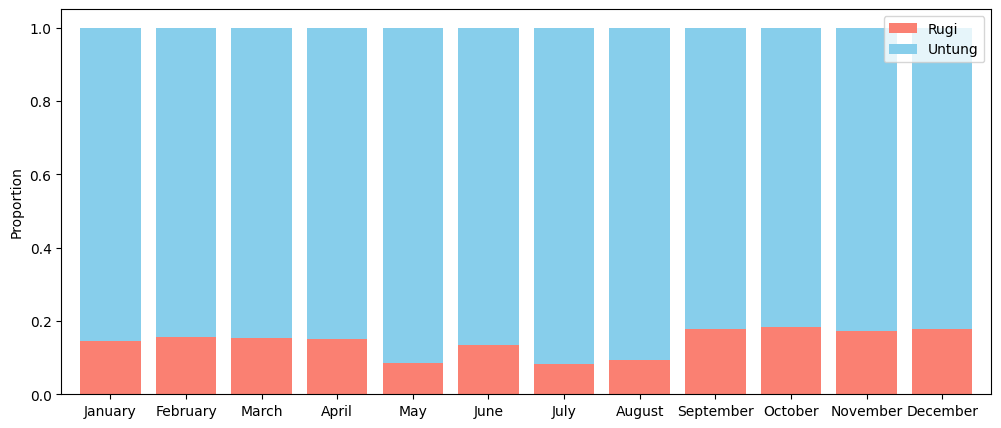

In [ ]:
# Menampilkan plot antar variabel 'Profit' dan 'Month'
import matplotlib.pyplot as plt

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

# Membuat tabulasi silang antar variabel untuk pembuatan plot
pd.crosstab(df['Month'], df['Profit'], normalize='index').plot.bar(rot=0,stacked=True, color=['salmon', 'skyblue'], width=0.8, figsize=(12, 5))

# Menambahkan label dan judul
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.xlabel('')
plt.xticks(rotation=0, ha='center')

# Menampilkan subplot
plt.show()

## Year

In [ ]:
# Membuat tabulasi silang antar variabel 'Profit' dan 'Year'
tabulasi = pd.crosstab(df['Profit'], df['Year'], margins= True)
tabulasi

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
Profit,,,,,,,,,,,,,,,,,,,,,
Rugi,8,12,11,15,13,10,14,13,6,10,...,12,9,13,8,11,12,13,18,16,233
Untung,83,84,80,75,75,84,76,76,85,83,...,76,75,73,68,62,61,16,31,28,1372
All,91,96,91,90,88,94,90,89,91,93,...,88,84,86,76,73,73,29,49,44,1605


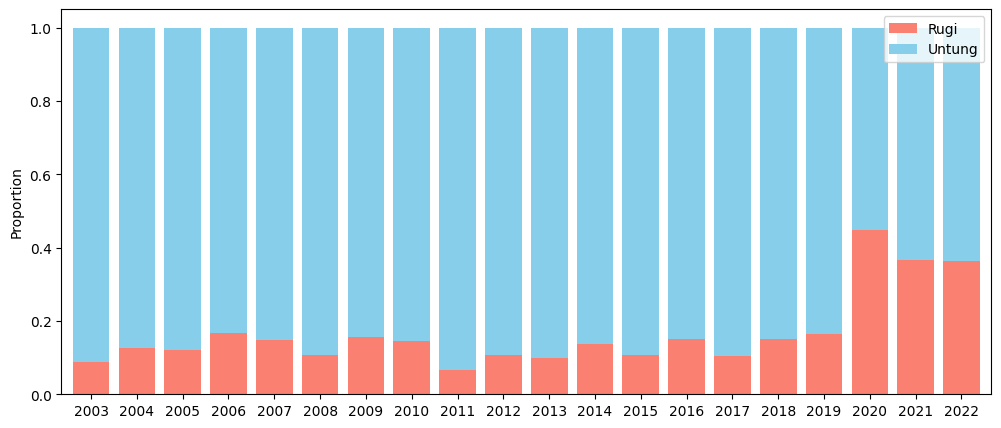

In [ ]:
# Menampilkan plot antar variabel 'Profit' dan 'Year'
pd.crosstab(df['Year'], df['Profit'], normalize='index').plot.bar(rot=0,stacked=True, color=['salmon', 'skyblue'], width=0.8, figsize=(12, 5))

# Menambahkan label dan judul
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.xlabel('')
plt.xticks(rotation=0, ha='center')

# Menampilkan subplot
plt.show()

## Rating

In [ ]:
# Membuat tabulasi silang antar variabel 'Profit' dan 'Rating'
tabulasi = pd.crosstab(df['Rating'], df['Profit'], margins= True)
tabulasi

Profit,Rugi,Untung,All
Rating,,,
1.9,0,1,1
2.2,1,0,1
2.4,0,1,1
2.6,0,1,1
2.8,1,1,2
3.4,1,0,1
3.5,0,1,1
3.6,1,0,1
3.7,0,1,1


Text(0.5, 0, '')

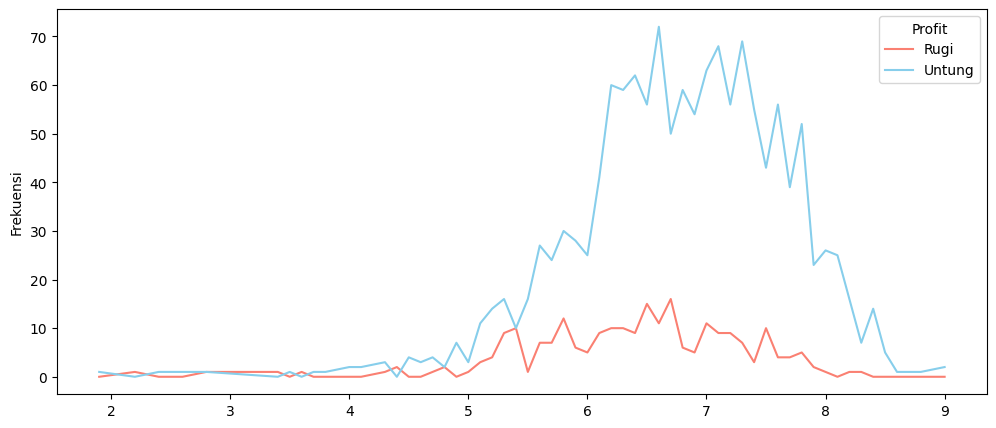

In [ ]:
# Menampilkan plot antar variabel 'Profit' dan 'Rating'
pd.crosstab(df['Rating'], df['Profit']).plot.line(rot=0, color=['salmon', 'skyblue'], figsize=(12, 5))
plt.ylabel('Frekuensi')
plt.xlabel('')

## Korelasi Variabel

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

df['Year'] = label_encoder.fit_transform(df['Year'])
df['Month'] = label_encoder.fit_transform(df['Month'])
df['Certificate'] = label_encoder.fit_transform(df['Certificate'])
df['Genre_Utama'] = label_encoder.fit_transform(df['Genre_Utama'])

<ipython-input-38-251319085c75>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


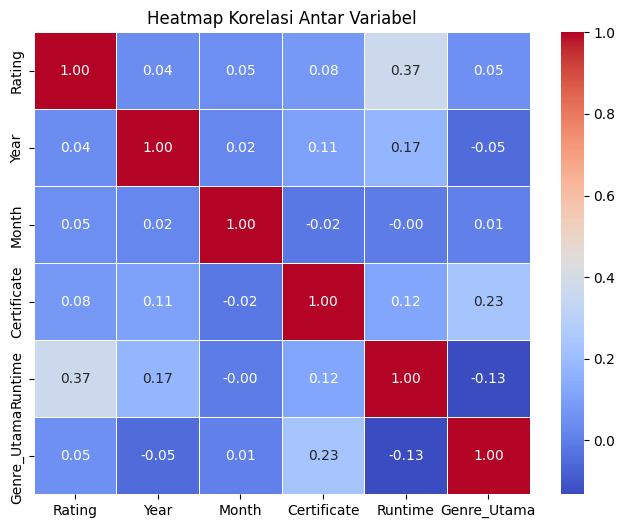

In [ ]:
import pandas as pd
import seaborn as sns

# Menghitung korelasi matriks
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()